<a href="https://colab.research.google.com/github/pdpavandesai/MergingDiabetesData/blob/main/DuttaDatasetAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import warnings
import numpy as np
import pandas as pd
import io
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
uploaded = files.upload()

Saving By Ishan Dutta.csv.xls to By Ishan Dutta.csv.xls


In [32]:
duttaDataset_Actual = pd.read_csv('By Ishan Dutta.csv.xls')
duttaDataset_Actual_Copy = duttaDataset_Actual.copy()
print('Actual shape of dataset before any processing: ',duttaDataset_Actual_Copy.shape)
actual_Rows = duttaDataset_Actual_Copy.shape[0]
duttaDataset_Actual_Copy = duttaDataset_Actual_Copy.drop_duplicates()
print('Shape of dataset after removing the duplicates: ',duttaDataset_Actual_Copy.shape)
rows_AfterDeleting_Duplicates = duttaDataset_Actual_Copy.shape[0]
print('No.of Duplicate rows in the Ishan Dutta''s Dataset = ', (actual_Rows - rows_AfterDeleting_Duplicates))

Actual shape of dataset before any processing:  (520, 17)
Shape of dataset after removing the duplicates:  (251, 17)
No.of Duplicate rows in the Ishan Duttas Dataset =  269


In [4]:
duttaDataset_Actual_Copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 251 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 251 non-null    int64 
 1   Gender              251 non-null    object
 2   Polyuria            251 non-null    object
 3   Polydipsia          251 non-null    object
 4   sudden weight loss  251 non-null    object
 5   weakness            251 non-null    object
 6   Polyphagia          251 non-null    object
 7   Genital thrush      251 non-null    object
 8   visual blurring     251 non-null    object
 9   Itching             251 non-null    object
 10  Irritability        251 non-null    object
 11  delayed healing     251 non-null    object
 12  partial paresis     251 non-null    object
 13  muscle stiffness    251 non-null    object
 14  Alopecia            251 non-null    object
 15  Obesity             251 non-null    object
 16  class               251 no

In [5]:
duttaDataset_Actual_Copy.isnull().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [6]:
duttaDataset_Actual_Copy.nunique()

Age                   51
Gender                 2
Polyuria               2
Polydipsia             2
sudden weight loss     2
weakness               2
Polyphagia             2
Genital thrush         2
visual blurring        2
Itching                2
Irritability           2
delayed healing        2
partial paresis        2
muscle stiffness       2
Alopecia               2
Obesity                2
class                  2
dtype: int64

In [7]:
duttaDataset_Actual_Copy.head(15)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
5,55,Male,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Positive
6,57,Male,Yes,Yes,No,Yes,Yes,Yes,No,No,No,Yes,Yes,No,No,No,Positive
7,66,Male,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,No,Yes,Yes,No,No,Positive
8,67,Male,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,Positive
9,70,Male,No,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,No,Yes,No,Positive


In [8]:
duttaDataset_Actual_Copy.describe()

,Age
count,251.000000
mean,48.864542
std,12.526036
min,16.000000
25%,39.000000
50%,48.000000
75%,58.000000
max,90.000000


# Distribution of target feature

Text(0.5, 1.0, 'Distribution of Diabetes class')

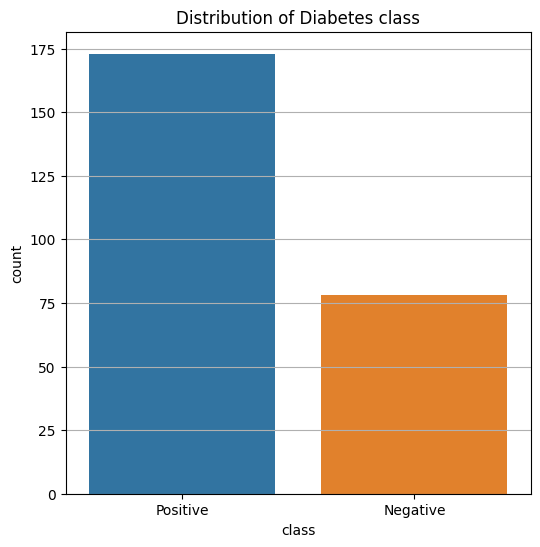

In [9]:
plt.figure(figsize=(6,6))
sns.countplot(data=duttaDataset_Actual_Copy, x='class').yaxis.grid(True)
plt.title('Distribution of Diabetes class')

# Distributions of predictor variables

Text(0.5, 1.0, 'Distribution of Age in the dataset')

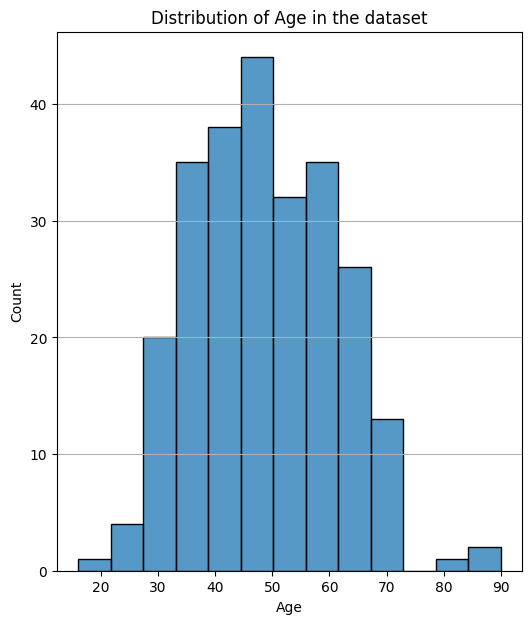

In [10]:
plt.figure(figsize=(6,7))
sns.histplot(data=duttaDataset_Actual_Copy,x='Age').yaxis.grid(True)
plt.title('Distribution of Age in the dataset')

Text(0.5, 1.0, 'Distribution of Gender in the dataset')

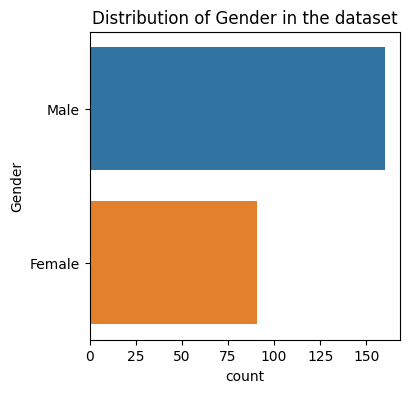

In [11]:
plt.figure(figsize=(4,4))
sns.countplot(data=duttaDataset_Actual_Copy,y='Gender')
plt.title('Distribution of Gender in the dataset')

Text(0.5, 1.0, 'Distribution of Polydipsia in the dataset')

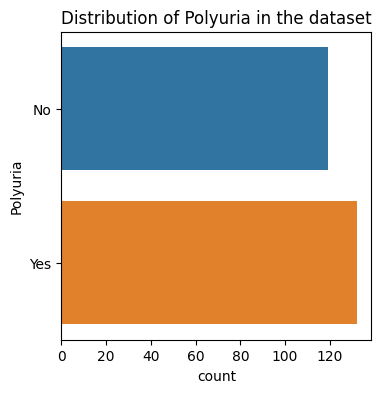

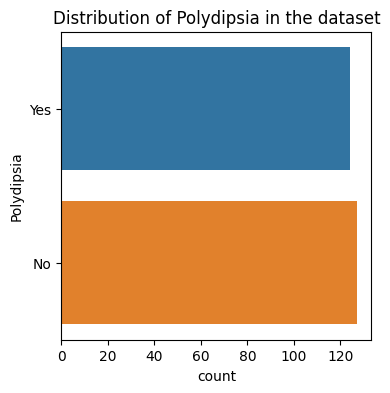

In [12]:
plt.figure(figsize=(4,4))
sns.countplot(data=duttaDataset_Actual_Copy,y='Polyuria')
plt.title('Distribution of Polyuria in the dataset')

plt.figure(figsize=(4,4))
sns.countplot(data=duttaDataset_Actual_Copy,y='Polydipsia')
plt.title('Distribution of Polydipsia in the dataset')

Text(0.5, 1.0, 'Distribution of people with weakness in the dataset')

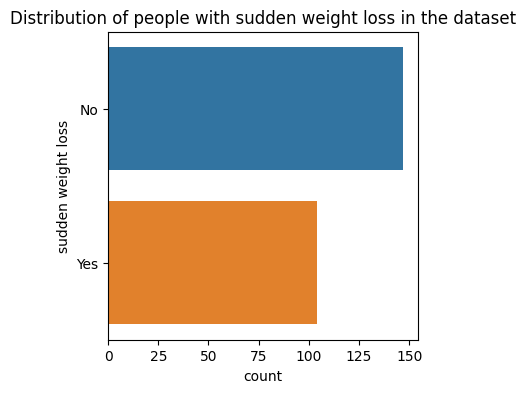

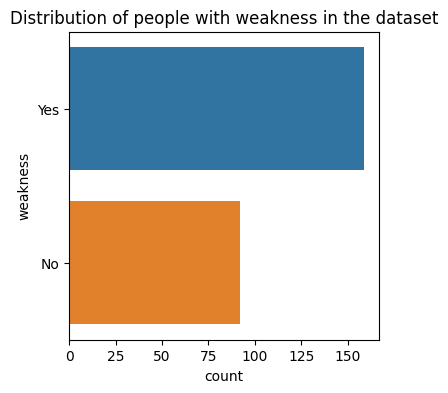

In [13]:
plt.figure(figsize=(4,4))
sns.countplot(data=duttaDataset_Actual_Copy,y='sudden weight loss')
plt.title('Distribution of people with sudden weight loss in the dataset')

plt.figure(figsize=(4,4))
sns.countplot(data=duttaDataset_Actual_Copy,y='weakness')
plt.title('Distribution of people with weakness in the dataset')

Text(0.5, 1.0, 'Distribution of people with genital thrush in the dataset')

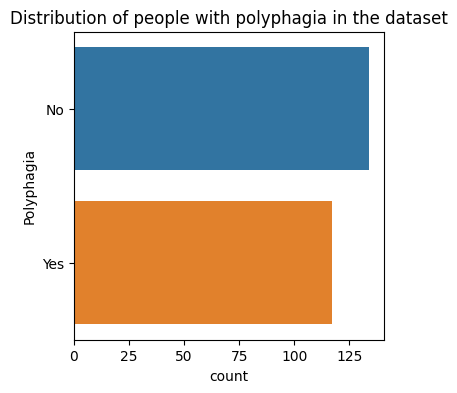

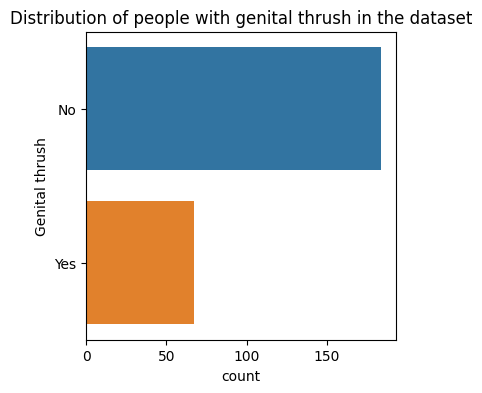

In [14]:
plt.figure(figsize=(4,4))
sns.countplot(data=duttaDataset_Actual_Copy,y='Polyphagia')
plt.title('Distribution of people with polyphagia in the dataset')

plt.figure(figsize=(4,4))
sns.countplot(data=duttaDataset_Actual_Copy,y='Genital thrush')
plt.title('Distribution of people with genital thrush in the dataset')

Text(0.5, 1.0, 'Distribution of people with itching in the dataset')

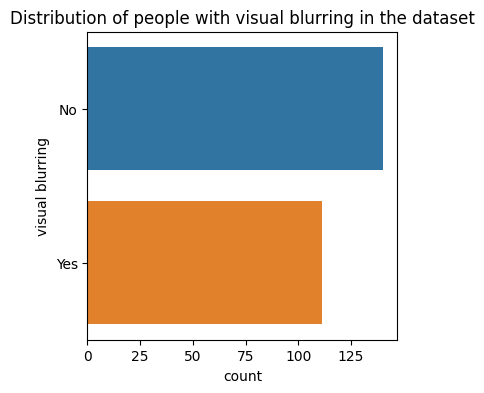

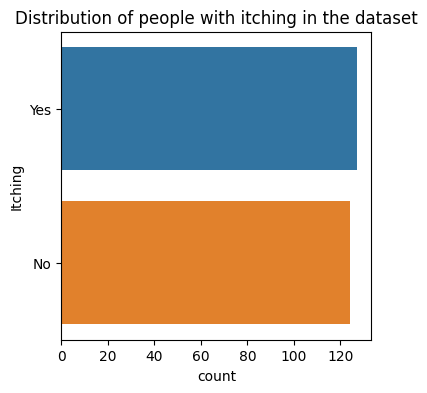

In [15]:
plt.figure(figsize=(4,4))
sns.countplot(data=duttaDataset_Actual_Copy,y='visual blurring')
plt.title('Distribution of people with visual blurring in the dataset')

plt.figure(figsize=(4,4))
sns.countplot(data=duttaDataset_Actual_Copy,y='Itching')
plt.title('Distribution of people with itching in the dataset')

Text(0.5, 1.0, 'Distribution of people with irritability in the dataset')

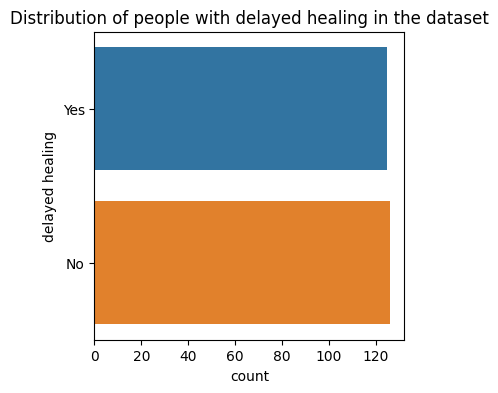

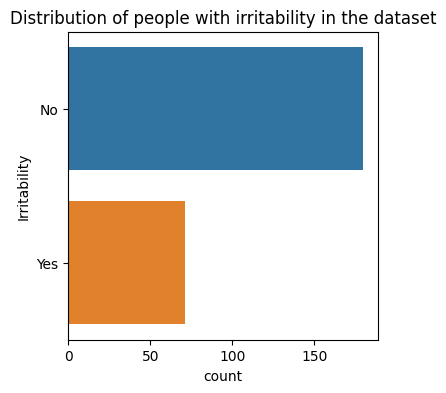

In [16]:
plt.figure(figsize=(4,4))
sns.countplot(data=duttaDataset_Actual_Copy,y='delayed healing')
plt.title('Distribution of people with delayed healing in the dataset')

plt.figure(figsize=(4,4))
sns.countplot(data=duttaDataset_Actual_Copy,y='Irritability')
plt.title('Distribution of people with irritability in the dataset')

Text(0.5, 1.0, 'Distribution of people with muscle stiffness in the dataset')

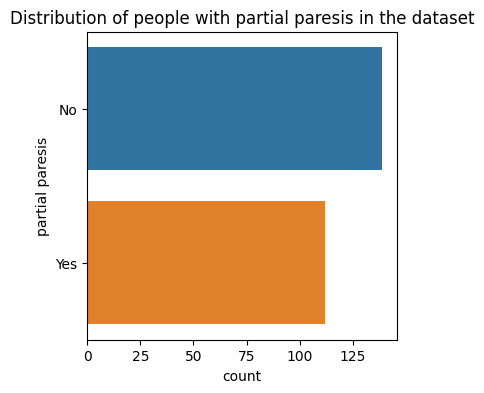

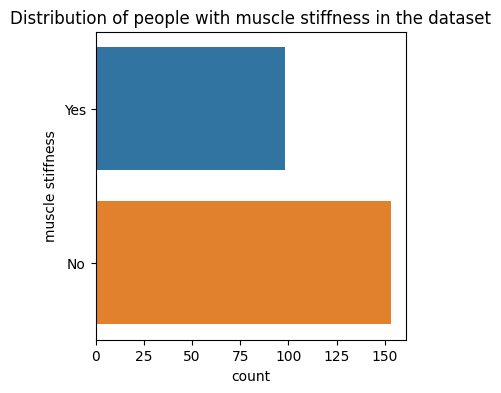

In [17]:
plt.figure(figsize=(4,4))
sns.countplot(data=duttaDataset_Actual_Copy,y='partial paresis')
plt.title('Distribution of people with partial paresis in the dataset')

plt.figure(figsize=(4,4))
sns.countplot(data=duttaDataset_Actual_Copy,y='muscle stiffness')
plt.title('Distribution of people with muscle stiffness in the dataset')

Text(0.5, 1.0, 'Distribution of people with Obesity in the dataset')

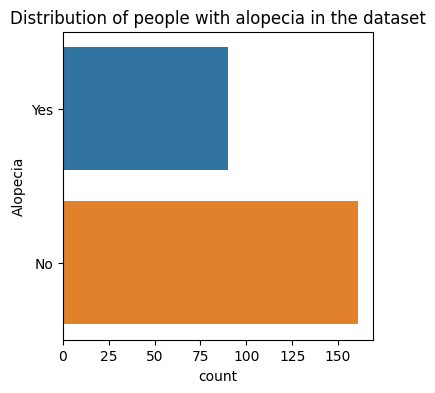

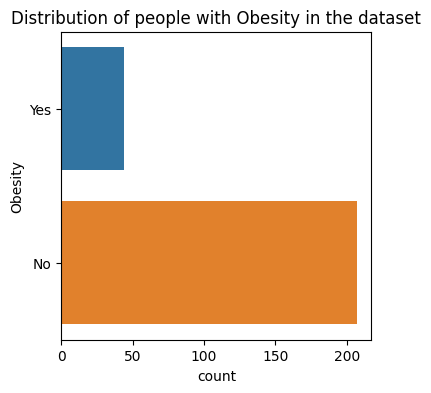

In [18]:
plt.figure(figsize=(4,4))
sns.countplot(data=duttaDataset_Actual_Copy,y='Alopecia')
plt.title('Distribution of people with alopecia in the dataset')

plt.figure(figsize=(4,4))
sns.countplot(data=duttaDataset_Actual_Copy,y='Obesity')
plt.title('Distribution of people with Obesity in the dataset')

# Relation(Visual) between target feature & continuous variable['Age']

Text(0.5, 1.0, 'Distribution of Diabetes w.r.t Age')

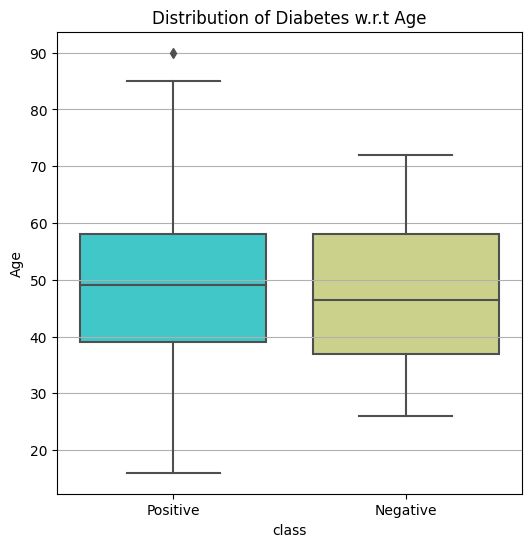

In [19]:
plt.figure(figsize=(6,6))
sns.boxplot(data=duttaDataset_Actual_Copy,x='class',y='Age',palette='rainbow').yaxis.grid(True)
plt.title('Distribution of Diabetes w.r.t Age')

# Relation(Visual) between target feature diabetes and categorical variables['Gender','Polyuria','Polydipsia','sudden weight loss','weakness','Polyphagia','Genital thrush','visual blurring','Itching','delayed healing','partial paresis','muscle stiffness','Alopecia','Obesity']

Text(0.5, 1.0, 'Distribution of Diabetes w.r.t Gender')

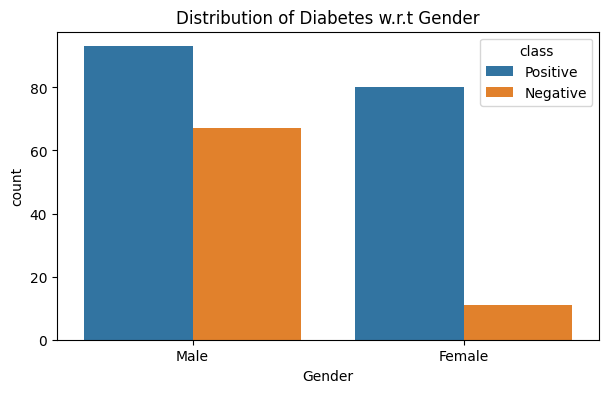

In [22]:
plt.figure(figsize=(7,4))
sns.countplot(data=duttaDataset_Actual_Copy,x='Gender',hue='class')
plt.title('Distribution of Diabetes w.r.t Gender')

Text(0.5, 1.0, 'Distribution of Diabetes w.r.t people with sudden weight loss')

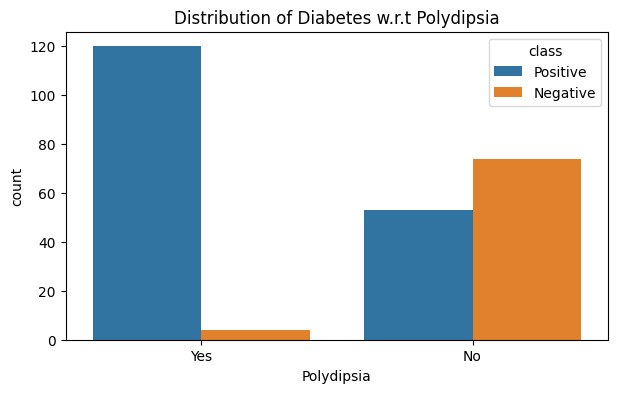

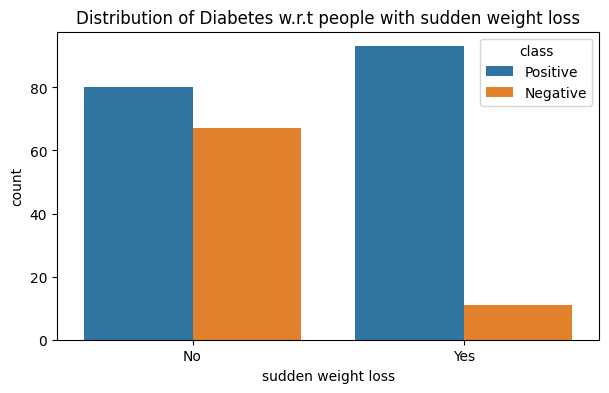

In [23]:
plt.figure(figsize=(7,4))
sns.countplot(data=duttaDataset_Actual_Copy,x='Polydipsia',hue='class')
plt.title('Distribution of Diabetes w.r.t Polydipsia')

plt.figure(figsize=(7,4))
sns.countplot(data=duttaDataset_Actual_Copy,x='sudden weight loss',hue='class')
plt.title('Distribution of Diabetes w.r.t people with sudden weight loss')

Text(0.5, 1.0, 'Distribution of Diabetes w.r.t Polyphagia')

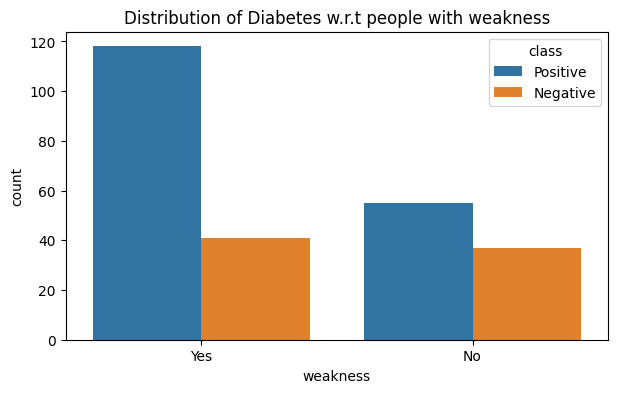

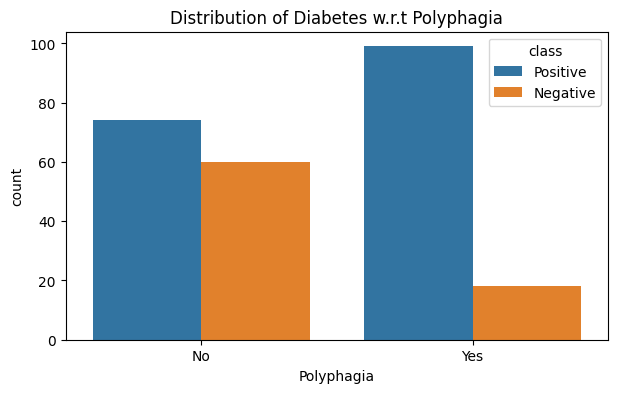

In [24]:
plt.figure(figsize=(7,4))
sns.countplot(data=duttaDataset_Actual_Copy,x='weakness',hue='class')
plt.title('Distribution of Diabetes w.r.t people with weakness')

plt.figure(figsize=(7,4))
sns.countplot(data=duttaDataset_Actual_Copy,x='Polyphagia',hue='class')
plt.title('Distribution of Diabetes w.r.t Polyphagia')

Text(0.5, 1.0, 'Distribution of Diabetes w.r.t people suffering with visual blurring')

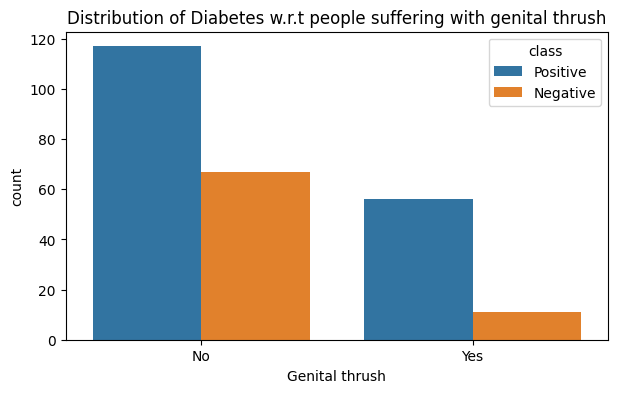

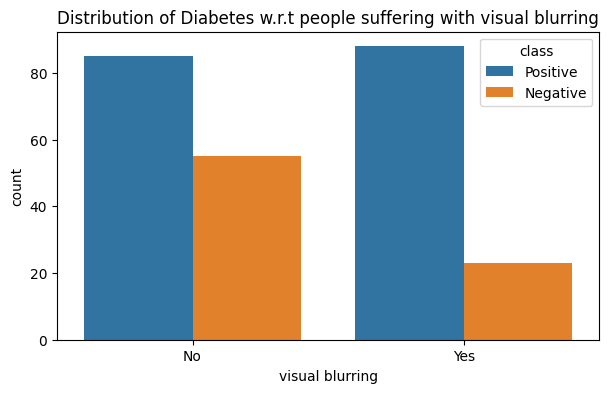

In [25]:
plt.figure(figsize=(7,4))
sns.countplot(data=duttaDataset_Actual_Copy,x='Genital thrush',hue='class')
plt.title('Distribution of Diabetes w.r.t people suffering with genital thrush')

plt.figure(figsize=(7,4))
sns.countplot(data=duttaDataset_Actual_Copy,x='visual blurring',hue='class')
plt.title('Distribution of Diabetes w.r.t people suffering with visual blurring')

Text(0.5, 1.0, 'Distribution of Diabetes w.r.t delayed healing')

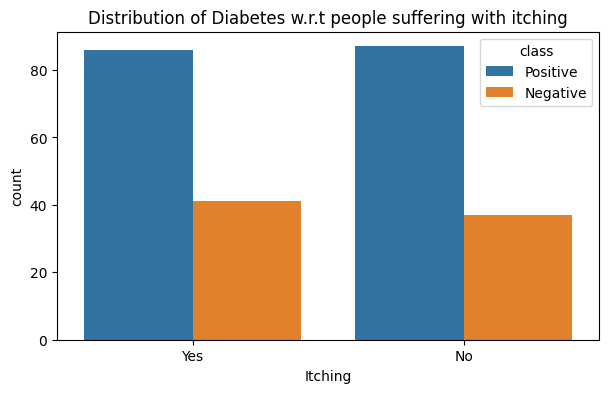

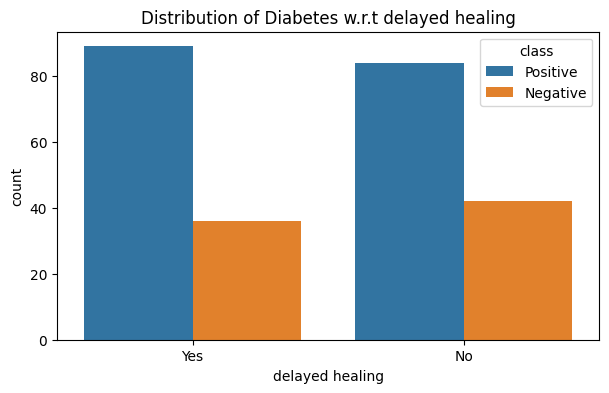

In [26]:
plt.figure(figsize=(7,4))
sns.countplot(data=duttaDataset_Actual_Copy,x='Itching',hue='class')
plt.title('Distribution of Diabetes w.r.t people suffering with itching')

plt.figure(figsize=(7,4))
sns.countplot(data=duttaDataset_Actual_Copy,x='delayed healing',hue='class')
plt.title('Distribution of Diabetes w.r.t delayed healing')

Text(0.5, 1.0, 'Distribution of Diabetes w.r.t people suffering with muscle stiffness')

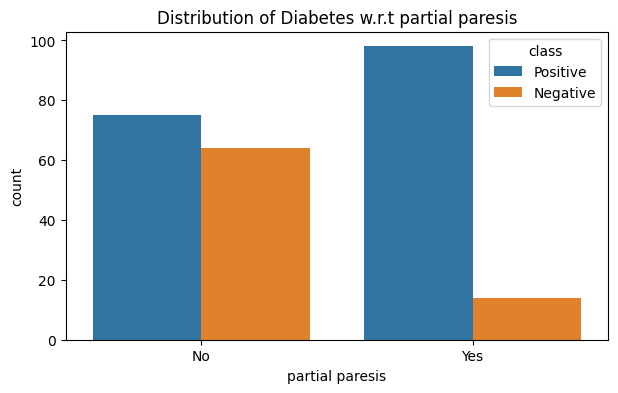

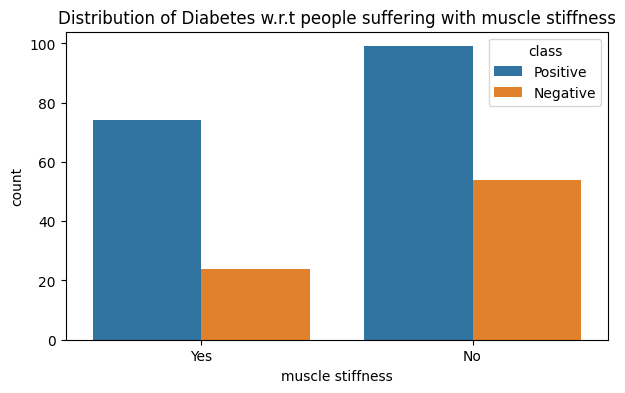

In [27]:
plt.figure(figsize=(7,4))
sns.countplot(data=duttaDataset_Actual_Copy,x='partial paresis',hue='class')
plt.title('Distribution of Diabetes w.r.t partial paresis')

plt.figure(figsize=(7,4))
sns.countplot(data=duttaDataset_Actual_Copy,x='muscle stiffness',hue='class')
plt.title('Distribution of Diabetes w.r.t people suffering with muscle stiffness')

Text(0.5, 1.0, 'Distribution of Diabetes w.r.t Obesity')

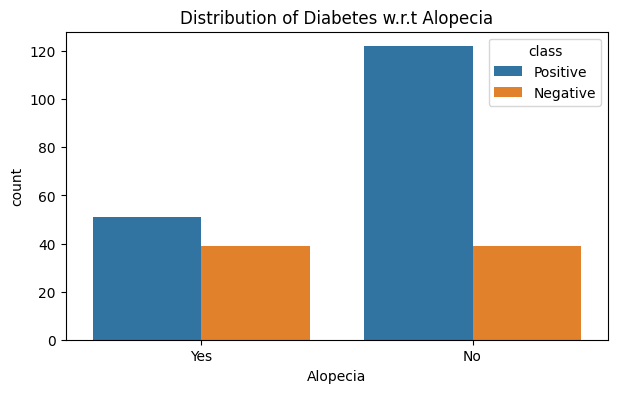

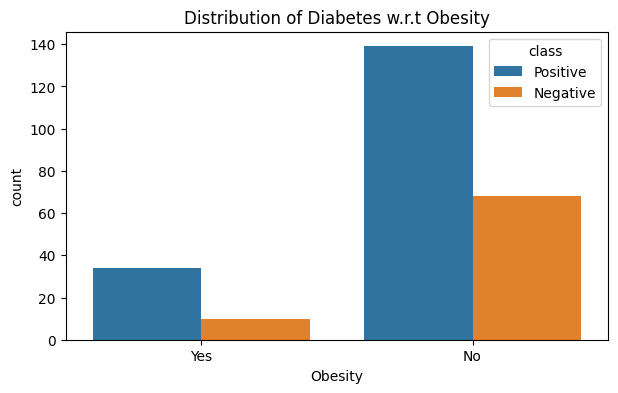

In [28]:
plt.figure(figsize=(7,4))
sns.countplot(data=duttaDataset_Actual_Copy,x='Alopecia',hue='class')
plt.title('Distribution of Diabetes w.r.t Alopecia')

plt.figure(figsize=(7,4))
sns.countplot(data=duttaDataset_Actual_Copy,x='Obesity',hue='class')
plt.title('Distribution of Diabetes w.r.t Obesity')

In [34]:
duttaDataset_Actual_Copy.rename(columns = {'sudden weight loss':'SuddenWeightLoss','Genital thrush' : 'GenitalThrush',
                                 'visual blurring' : 'VisualBlurring', 'partial paresis' : 'PartialParesis','class':'Diabetes'
                                 ,'muscle stiffness':'MuscleStiffness','delayed healing':'DelayedHealing','weakness':'Weakness'},inplace=True)

duttaDataset_Actual_Copy['Gender'] = LabelEncoder().fit_transform(duttaDataset_Actual_Copy.Gender)
duttaDataset_Actual_Copy['Polyuria'] = LabelEncoder().fit_transform(duttaDataset_Actual_Copy.Polyuria)
duttaDataset_Actual_Copy['Polydipsia'] = LabelEncoder().fit_transform(duttaDataset_Actual_Copy.Polydipsia)
duttaDataset_Actual_Copy['SuddenWeightLoss'] = LabelEncoder().fit_transform(duttaDataset_Actual_Copy.SuddenWeightLoss)
duttaDataset_Actual_Copy['Weakness'] = LabelEncoder().fit_transform(duttaDataset_Actual_Copy.Weakness)
duttaDataset_Actual_Copy['Polyphagia'] = LabelEncoder().fit_transform(duttaDataset_Actual_Copy.Polyphagia)
duttaDataset_Actual_Copy['GenitalThrush'] = LabelEncoder().fit_transform(duttaDataset_Actual_Copy.GenitalThrush)
duttaDataset_Actual_Copy['VisualBlurring'] = LabelEncoder().fit_transform(duttaDataset_Actual_Copy.VisualBlurring)
duttaDataset_Actual_Copy['PartialParesis'] = LabelEncoder().fit_transform(duttaDataset_Actual_Copy.PartialParesis)
duttaDataset_Actual_Copy['Alopecia'] = LabelEncoder().fit_transform(duttaDataset_Actual_Copy.Alopecia)
duttaDataset_Actual_Copy['Diabetes'] = LabelEncoder().fit_transform(duttaDataset_Actual_Copy.Diabetes)
duttaDataset_Actual_Copy['Itching'] = LabelEncoder().fit_transform(duttaDataset_Actual_Copy.Itching)
duttaDataset_Actual_Copy['Irritability'] = LabelEncoder().fit_transform(duttaDataset_Actual_Copy.Irritability)
duttaDataset_Actual_Copy['DelayedHealing'] = LabelEncoder().fit_transform(duttaDataset_Actual_Copy.DelayedHealing)
duttaDataset_Actual_Copy['MuscleStiffness'] = LabelEncoder().fit_transform(duttaDataset_Actual_Copy.MuscleStiffness)
duttaDataset_Actual_Copy['Obesity'] = LabelEncoder().fit_transform(duttaDataset_Actual_Copy.Obesity)
duttaDataset_Actual_Copy.head(15)

,Age,Gender,Polyuria,Polydipsia,SuddenWeightLoss,Weakness,Polyphagia,GenitalThrush,VisualBlurring,Itching,Irritability,DelayedHealing,PartialParesis,MuscleStiffness,Alopecia,Obesity,Diabetes
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
5,55,1,1,1,0,1,1,0,1,1,0,1,0,1,1,1,1
6,57,1,1,1,0,1,1,1,0,0,0,1,1,0,0,0,1
7,66,1,1,1,1,1,0,0,1,1,1,0,1,1,0,0,1
8,67,1,1,1,0,1,1,1,0,1,1,0,1,1,0,1,1
9,70,1,0,1,1,1,1,0,1,1,1,0,0,0,1,0,1


In [35]:
def categorizeAge(age):
  if age>=18 and age<=24:
    return 1
  elif age>=25 and age<=29:
    return 2
  elif age>=30 and age<=34:
    return 3
  elif age>=35 and age<=39:
    return 4
  elif age>=40 and age<=44:
    return 5
  elif age>=45 and age<=49:
    return 6
  elif age>=50 and age<=54:
    return 7
  elif age>=55 and age<=59:
    return 8
  elif age>=60 and age<=64:
    return 9
  elif age>=65 and age<=69:
    return 10
  elif age>= 70 and age<=74:
    return 11
  elif age>=75 and age<=79:
    return 12
  elif age>=80:
    return 13
  else:
    return 0

In [36]:
duttaDataset_Actual_Copy['Age'] = duttaDataset_Actual_Copy['Age'].apply(categorizeAge)
duttaDataset_Actual_Copy.head()

,Age,Gender,Polyuria,Polydipsia,SuddenWeightLoss,Weakness,Polyphagia,GenitalThrush,VisualBlurring,Itching,Irritability,DelayedHealing,PartialParesis,MuscleStiffness,Alopecia,Obesity,Diabetes
0,5,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,8,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,5,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,6,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,9,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


Text(0.5, 1.0, 'Distribution of Diabetes w.r.t Age after encoding Age')

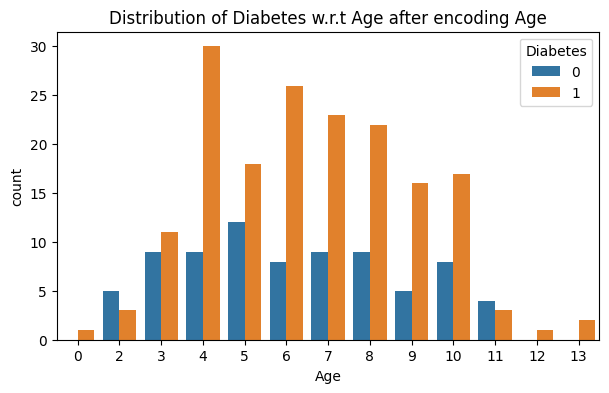

In [37]:
plt.figure(figsize=(7,4))
sns.countplot(data=duttaDataset_Actual_Copy,x='Age',hue='Diabetes')
plt.title('Distribution of Diabetes w.r.t Age after encoding Age')

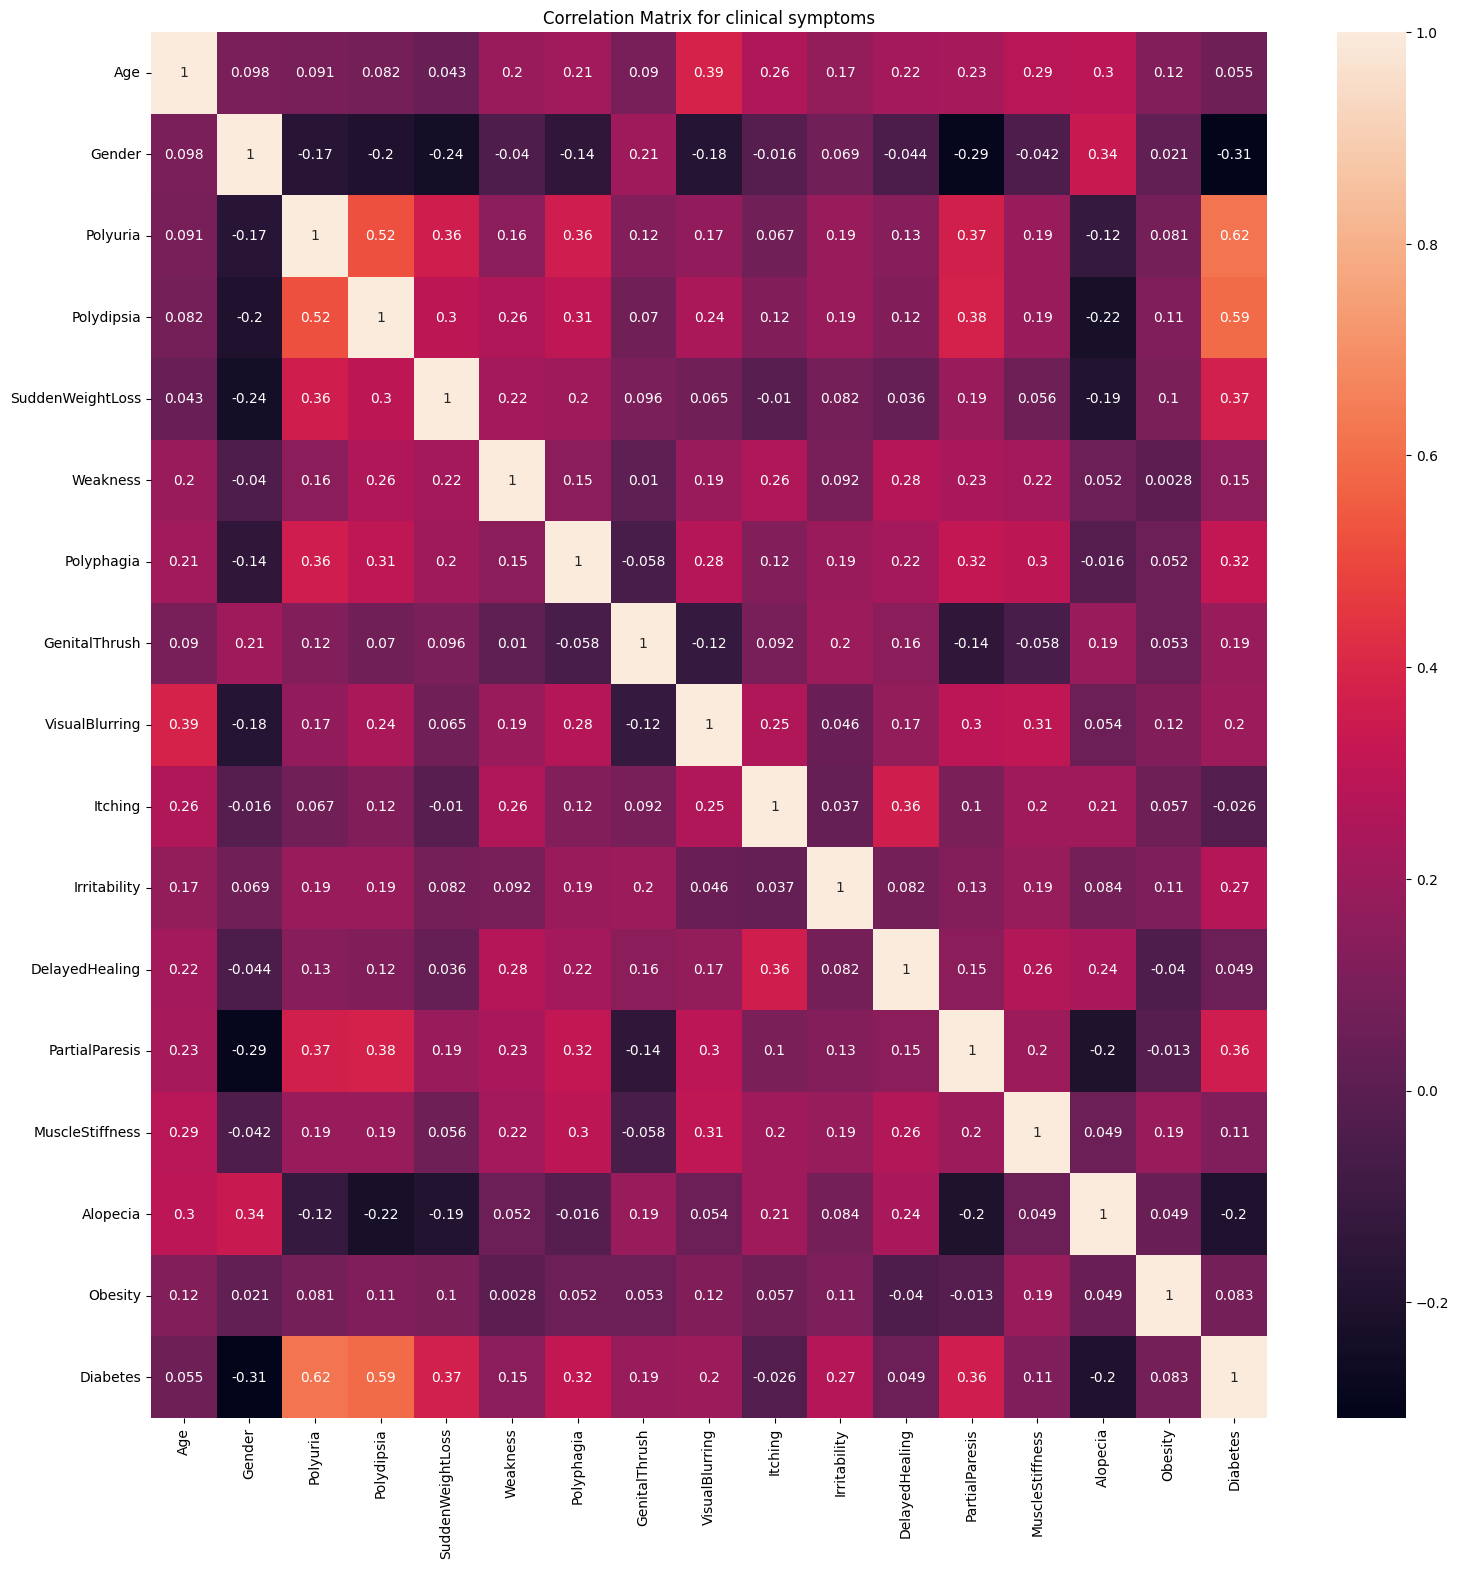

In [42]:
plt.figure(figsize=(18,18))
sns.heatmap(duttaDataset_Actual_Copy.corr(), annot=True)
plt.title('Correlation Matrix for clinical symptoms')
plt.show()

### From the above correlation-matrix we can conclude that a total of 7 features ['Polyuria,'Polydipsia','SuddenWeightLoss','PartialParesis','Polyphagia','Irritability','VisualBlurring'] are correlated to Diabetes.

In [43]:
selected_features = ['Polyuria','Polydipsia','SuddenWeightLoss','PartialParesis','Polyphagia','Irritability','VisualBlurring','Diabetes']

In [44]:
selected_symptomatic_features=duttaDataset_Actual_Copy.copy()
selected_symptomatic_features = selected_symptomatic_features[selected_features]

In [47]:
selected_symptomatic_features.head()

,Polyuria,Polydipsia,SuddenWeightLoss,PartialParesis,Polyphagia,Irritability,VisualBlurring,Diabetes
0,0,1,0,0,0,0,0,1
1,0,0,0,1,0,0,1,1
2,1,0,0,0,1,0,0,1
3,0,0,1,0,1,0,0,1
4,1,1,1,1,1,1,1,1


In [49]:
selected_symptomatic_features.to_csv('FinalDuttaDataset.csv',index=False)

In [60]:
# Splitting data into training & testing data
X_train, X_test, y_train, y_test = train_test_split(selected_symptomatic_features.drop('Diabetes', axis=1), selected_symptomatic_features['Diabetes'], test_size=0.25, random_state=42)

In [61]:
# Creating ANN with different solvers and with max_iterations
print('ANN model in predicting possiblity of diabetes for clinical symptoms\n')
for max_iterations in range(1000,2200,200):
  for solvers in ['lbfgs','sgd','adam']:
    ANN_model = MLPClassifier(hidden_layer_sizes=(128, 64, 32), activation='relu', solver=solvers, max_iter= max_iterations)
    # Training ANN_model
    ANN_model.fit(X_train, y_train)
    # Evaluate ANN_model on test set
    accuracy = ANN_model.score(X_test, y_test)
    accuracy = round(accuracy*100,2)
    print('Accuracy when', solvers, 'solver is used:', accuracy,'% when max_iter = ',max_iterations)
    # Make predictions on new data
    new_data = pd.DataFrame({'Polyuria': [0], 'Polydipsia': [0], 'SuddenWeightLoss': [1], 'PartialParesis': [0]
                             ,'Polyphagia': [1],'Irritability':[0],'VisualBlurring':[0]})
    predictions_ANN_model = ANN_model.predict(new_data)
    if predictions_ANN_model == 1:
      print('Recommended below medical tests: ')
      print('')
    else:
      print('Recommended to consult a doctor as it is not diabetes')
      print('')

ANN model in predicting possiblity of diabetes for clinical symptoms

Accuracy when lbfgs solver is used: 88.89 % when max_iter =  1000
Recommended below medical tests: 

Accuracy when sgd solver is used: 84.13 % when max_iter =  1000
Recommended to consult a doctor as it is not diabetes

Accuracy when adam solver is used: 87.3 % when max_iter =  1000
Recommended below medical tests: 

Accuracy when lbfgs solver is used: 88.89 % when max_iter =  1200
Recommended below medical tests: 

Accuracy when sgd solver is used: 84.13 % when max_iter =  1200
Recommended below medical tests: 

Accuracy when adam solver is used: 87.3 % when max_iter =  1200
Recommended below medical tests: 

Accuracy when lbfgs solver is used: 88.89 % when max_iter =  1400
Recommended below medical tests: 

Accuracy when sgd solver is used: 85.71 % when max_iter =  1400
Recommended below medical tests: 

Accuracy when adam solver is used: 87.3 % when max_iter =  1400
Recommended below medical tests: 

Accuracy when